# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname:RANGRAZIASL

Student name:ASAL
    
ID:2046832

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2046832
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [61 54 62 54 55 53 68 71 62 60]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


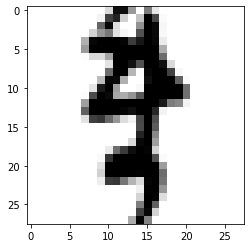

LABEL: 6
INPUT:


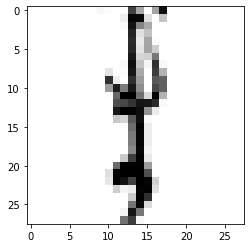

LABEL: 6
INPUT:


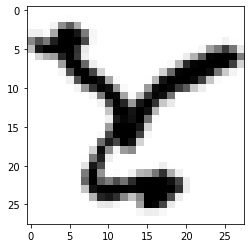

LABEL: 9
INPUT:


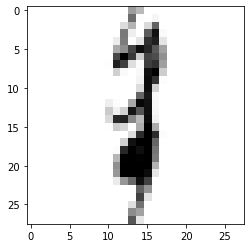

LABEL: 6


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV
from sklearn import svm#..............
# parameters for linear SVM
parameters = {'c':[0.01, 0.1, 1, 10]}
params=np.array((0.01, 0.1, 1, 10))
#train linear SVM

# ADD YOUR CODE
for i in (params):
    linear_svc=svm.SVC(C=i,kernel='linear') 
    print('---------')
    print(linear_svc.kernel,"C:",i) 
    linear_svc.fit(X_train,y_train) 
    print ('RESULTS FOR LINEAR KERNEL')

    print(linear_svc.score(X_train,y_train))

    print("Best parameters set found:")
    # ADD YOUR CODE
    print(linear_svc.get_params(),'\n')
    print("Weights assigned when kernel:'linear:'",'\n',linear_svc.coef_,'\n')
    print("Constants in decision function:",'\n',linear_svc.intercept_,'\n')
    print("Multipliers of parameter C for each class:",'\n',linear_svc.class_weight_,'\n')
    print("Score with best parameters:")
    # ADD YOUR CODE
    print(linear_svc.score(X_test,y_test))
    
# print("All scores on the grid:")
# parameters_grid= {'kernel':['linear'], 'C':[0.01, 0.1, 1, 10]}
# svm=svm.SVC()
# clf = GridSearchCV(svm, parameters_grid)
# clf.fit(X,y)
# print(sorted(clf.cv_results_.keys()))
    

---------
linear C: 0.01
RESULTS FOR LINEAR KERNEL
0.8933333333333333
Best parameters set found:
{'C': 0.01, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False} 

Weights assigned when kernel:'linear:' 
 [[ 0.00000000e+00  0.00000000e+00  2.40235753e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.13483379e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.27450980e-04 -1.46098220e-03 -9.50726858e-03 ... -4.33408958e-03
  -1.38002747e-03  0.00000000e+00]
 ...
 [ 3.36069143e-05  3.36069143e-04  3.36069143e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.92156863e-05  2.00415559e-04 -1.28053908e-04 ... -2.28588898e-03
  -9.53888402e-05 -2.04404658e-04]
 [ 0.00000000e+00 -7.58230249e-05 -6.95301771e

## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}
params_degree2=np.array((0.01, 0.1, 1, 10))
gammas_degree2=np.array((0.01,0.1,1))
#run SVM with poly of degree 2 kernel

# ADD YOUR CODE
for i in (params_degree2):
    for j in (gammas_degree2):
        second_poly=svm.SVC(C=i,kernel='poly',gamma=j,degree=2)
        print('---------')
        second_poly.fit(X_train,y_train)
        print(second_poly.kernel,'c:',i,'gamma:',j)
        print ('RESULTS FOR POLY DEGREE=2 KERNEL')

        print(second_poly.score(X_train,y_train))
        print("Best parameters set found:")
        # ADD YOUR CODE
        
        print(second_poly.get_params()) 
        print("Constants in decision function:",'\n',second_poly.intercept_,'\n')
        print("Multipliers of parameter C for each class:",'\n',second_poly.class_weight_,'\n')
        print("Score with best parameters:")
        
        # ADD YOUR CODE
        print(second_poly.score(X_test,y_test))
        print("\nAll scores on the grid:")
        # ADD YOUR CODE

---------
poly c: 0.01 gamma: 0.01
RESULTS FOR POLY DEGREE=2 KERNEL
0.11833333333333333
Best parameters set found:
{'C': 0.01, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 0.01, 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Constants in decision function: 
 [ 0.67715631 -0.91745038  0.78399081  0.83319764  0.81226774 -0.79381171
 -0.84210024 -0.7377339   0.5211735  -0.97400916  0.05996813 -0.63031506
  0.90353642 -0.89367829 -0.79354837 -0.91657602 -0.88153899  0.93722654
  1.00184974  0.9729885  -0.83740006 -0.71098596  0.09413233  0.97107133
 -0.62690112  0.88206602 -0.85195605 -0.83264696 -0.83820087 -0.86677478
  0.61760907 -0.93946605 -0.89647092 -0.95706472 -0.97184897 -0.88492129
 -0.86554005 -0.90545486 -0.89472067 -0.74805763  0.84926348  0.85774997
  0.73638345  0.78125345  0.85165955] 

Multipliers of parame

0.798

All scores on the grid:
---------
poly c: 1.0 gamma: 1.0
RESULTS FOR POLY DEGREE=2 KERNEL
1.0
Best parameters set found:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 1.0, 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Constants in decision function: 
 [-0.67716345 -0.38370654  0.16819894  0.06487664 -0.26780706 -0.4514902
  0.1863637  -0.07123983 -0.20547014  0.4090021   0.78786756  0.73430775
  0.55160336  0.35831659  0.81128015  0.80994422  0.63329004  0.56991349
  0.44232237  0.29161132 -0.04310207  0.59886419  0.54222124  0.23027349
 -0.05011071 -0.43065695 -0.5342215  -0.03069962 -0.27943515 -0.32786057
 -0.30775369 -0.39224866  0.27969193 -0.00228306 -0.26380854 -0.24709843
  0.50955503  0.20903713  0.0894811   0.55930783  0.47532911  0.2964714
 -0.30758698 -0.48036435 -0.14200682] 

Multipliers 

## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}
params=np.array((0.01, 0.1, 1))
gammas=np.array((0.01,0.1,1))
#run SVM with poly of higher degree kernel
degree = 3

# ADD YOUR CODE
for i in (params):
    for j in (gammas):
        poly=svm.SVC(C=i,kernel='poly',gamma=j,degree=3)
        print('---------')
        poly.fit(X_train,y_train)
        print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL',"c:",i,"gamma:",j)
        print(poly.score(X_train,y_train))
        print("Best parameters set found:")
        # ADD YOUR CODE
        print(poly.get_params())
        print("Constants in decision function:",'\n',poly.intercept_,'\n')
        print("Multipliers of parameter C for each class:",'\n',poly.class_weight_,'\n')
        print("Score with best parameters:")
        # ADD YOUR CODE
        print(poly.score(X_test,y_test))
        print("\nAll scores on the grid:")
        # ADD YOUR CODE

---------
RESULTS FOR POLY DEGREE= 3  KERNEL c: 0.01 gamma: 0.01
0.11833333333333333
Best parameters set found:
{'C': 0.01, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Constants in decision function: 
 [ 0.6366443  -0.93644485  0.70846851  0.76933629  0.77115641 -0.81769266
 -0.83507801 -0.68274767  0.23829589 -0.97934689  0.08726819 -0.39639989
  0.91980792 -0.89159706 -0.80068347 -0.89498242 -0.87065019  0.95920234
  0.99909484  0.98436493 -0.79520209 -0.65203284  0.13684492  0.97519267
 -0.38628799  0.87188828 -0.86673825 -0.83168778 -0.83754473 -0.85512693
  0.44134396 -0.9520236  -0.8966135  -0.93286782 -0.94690134 -0.90342067
 -0.86058972 -0.91231378 -0.88663851 -0.69734515  0.82647377  0.85541941
  0.67974905  0.74640387  0.81286287] 

Multipliers of parameter

0.7325

All scores on the grid:
---------
RESULTS FOR POLY DEGREE= 3  KERNEL c: 1.0 gamma: 1.0
1.0
Best parameters set found:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1.0, 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Constants in decision function: 
 [-0.86811955 -0.45854824  0.33029013  0.09783161 -0.27416055 -0.73482951
  0.24087086  0.04766774 -0.19701111  0.68969553  0.93415909  0.89473418
  0.79167143  0.36950229  0.92479878  0.91754238  0.82712561  0.70046639
  0.56225362  0.27654571 -0.40457836  0.66689894  0.58985446  0.30475259
 -0.22544353 -0.56465986 -0.84557787 -0.1089582  -0.30163806 -0.48762518
 -0.35382478 -0.75746922  0.20050852  0.00612849 -0.29236285 -0.59947836
  0.51500405  0.33072209  0.07869822  0.82315095  0.77532599  0.63580837
 -0.21336505 -0.46028526 -0.25435476] 

Multipliers 

## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [67]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}
params_rbf=np.array((0.01, 0.1, 1))
gammas_rbf=np.array((0.01,0.1,1))
#run SVM with rbf kernel

# ADD YOUR CODE
for i in (params_rbf):
    for j in (gammas_rbf):
        rbf_kernel =SVC(kernel='rbf', gamma=j, C=i)
        print('---------')
        rbf_kernel.fit(X_train, y_train)
        print ('RESULTS FOR rbf KERNEL',"C:",i,"gamma:",j)
        print(rbf_kernel.score(X_train,y_train))
        print("Best parameters set found:")
        # ADD YOUR CODE
        print(rbf_kernel.get_params())
        print("Constants in decision function:",'\n',rbf_kernel.intercept_,'\n')
        print("Multipliers of parameter C for each class:",'\n',rbf_kernel.class_weight_,'\n')
        print("Score with best parameters:")
        # ADD YOUR CODE
        print(rbf_kernel.score(X_test,y_test))
        print("\nAll scores on the grid:")
        # ADD YOUR CODE

---------
RESULTS FOR rbf KERNEL C: 0.01 gamma: 0.01
0.11833333333333333
Best parameters set found:
{'C': 0.01, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Constants in decision function: 
 [ 0.94176585 -0.87714208  0.95281401  0.9364705   0.96958419 -0.87050888
 -0.94141542 -0.88924282  0.92999472 -0.9819022  -0.02360161 -0.97894643
  0.90555049 -0.97498294 -0.96183739 -0.98187421 -0.98359209  0.91115748
  0.93151342  0.94523433 -0.9636438  -0.9563346  -0.00862076  0.92314122
 -0.94806771  0.95471661 -0.91164111 -0.95282733 -0.92496464 -0.95273437
  0.95624756 -0.93159654 -0.94779307 -0.94580641 -0.96678296 -0.93566674
 -0.96759059 -0.95119525 -0.96467131 -0.93718807  0.92692043  0.91508898
  0.9411347   0.93939483  0.93242998] 

Multipliers of parameter C for each c

0.81275

All scores on the grid:
---------
RESULTS FOR rbf KERNEL C: 1.0 gamma: 0.1
1.0
Best parameters set found:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Constants in decision function: 
 [ 0.11725946  0.0014061   0.11342738  0.09700528  0.14199965 -0.07176816
 -0.13768099 -0.00887579  0.01498833 -0.11859621 -0.01253186 -0.03281645
  0.02125495 -0.18464454 -0.23728418 -0.12671849 -0.10321273  0.11116192
  0.09665546  0.14054258 -0.06441852 -0.12397816 -0.0077761   0.01380047
 -0.02065917  0.03723028 -0.17822496 -0.23665674 -0.12234501 -0.0973582
  0.05984261 -0.16474196 -0.22265467 -0.10636238 -0.08112824 -0.20037972
 -0.25312139 -0.14977213 -0.12780987 -0.05277451  0.0577837   0.08769915
  0.12356933  0.15191027  0.02510328] 

Multipliers of parameter 

## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

MY ANSWER:

the main point that I have observed, choosing the appropriate paramenters (c and gamma ) is more important than choosing different kernels.also rbf kernel is the best one with comprarison to polynomial and linear kernel.

## TO DO 5
Report here the best SVM kernel and parameters

In [11]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel='rbf', gamma=0.01, C=1.0)
best_SVM.fit(X_train, y_train)
# ADD YOUR CODE
training_error=1-best_SVM.score(X_train,y_train)
test_error=1-best_SVM.score(X_test,y_test)
# (error is 1 - svm.score)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.023333
Best SVM test error: 0.187250


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [12]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


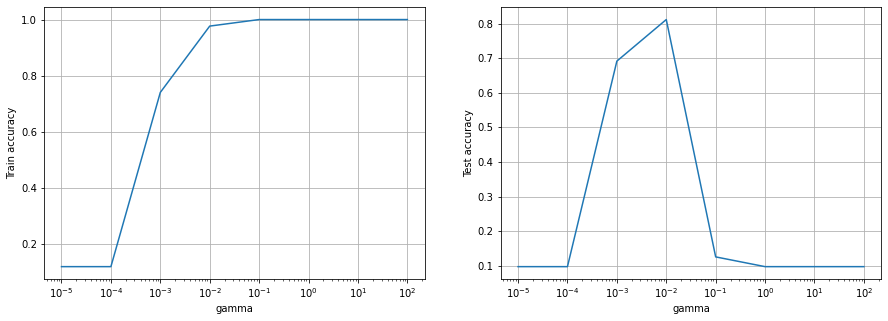

In [13]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
for i in gamma_values:
    different_gammas=SVC(kernel='rbf', gamma=i, C=1.0)
    different_gammas.fit(X_train, y_train)
    train_acc_list.append(different_gammas.score(X_train,y_train))
    test_acc_list.append(different_gammas.score(X_test,y_test))
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

MY ANSWER:

training_error is decreasing while gamma value increasing, as it shown in the figure after gamma=0.1 it hit the maximun accuracy(100%).
test_error is decreasing up to gamma=0.01, after which the error increase very fast. the main reason for this issue is overfitting.
overfitting : in the training step our algorithm started to memorize instead of learning, which we can see in gamma>0.01 where traning_accuracy is 100 but test_accuracy decreasing. 
best value of gamma is( gamma=0.01) because test accuracy is maximun(81%). 

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [14]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [208 165 192 212 207 221 229 208 172 186]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [15]:
#get training and test error for the best SVM model from CV
# training set is = 1000
# ADD YOUR CODE
best_SVM = SVC(kernel='rbf', gamma=0.01, C=1.0)
best_SVM.fit(X_train, y_train)
# ADD YOUR CODE
training_error=1-best_SVM.score(X_train,y_train)
test_error=1-best_SVM.score(X_test,y_test)
# (error is 1 - svm.score)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.026000
Best SVM test error: 0.167254


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [24]:
from sklearn import linear_model

# ADD YOUR CODE
reg = linear_model.LogisticRegression(C=1000,max_iter=1000) 
reg.fit(X_train, y_train)
# ADD YOUR CODE
training_error=1-reg.score(X_train,y_train)
test_error=1-reg.score(X_test,y_test)
# (error is 1 - svm.score)
print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.282259


## TO DO 9 Try  with regularization (use C=1)¶

In [22]:
# ADD YOUR CODE
reg = linear_model.LogisticRegression(C=1,max_iter=1000) 
reg.fit(X_train, y_train) 
# ADD YOUR CODE
training_error=1-reg.score(X_train,y_train)
test_error=1-reg.score(X_test,y_test)
# (error is 1 - svm.score)
print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.003500
Best regularized logistic regression test error: 0.254741


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

MY ANSWER:

training_error for 3 different training_set(svm):

(training_set=600 :  error=0.02333)
(training_set=1000 : error=0.02600)
(training_set=2000 : error=0.02300 )

as we can see from the results, with increaing the number of training set, the error of training set is remain stable.

test_error for 3 different training_set(svm):

(test_error=600 : error=0.187250)
(test_error=1000 : error=0.167254)
(test_error=2000 : error=0.124172)

as we can see from the result,with increasing the number of training set, the test error decreasing.

comparison between regularization and non regularization(  logistic regression )

(non regularization : training error: 0.000000 , test error: 0.282259)
(regularization : training error: 0.003500 , test error: 0.254741)

test error in regularization (c=1.0) is smaller than non regularization(c=1000) 

the results of SVM and of Logistic Regression:

with comparison between the result, we underestand that svm is better algorithm to use as it has less test error!

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


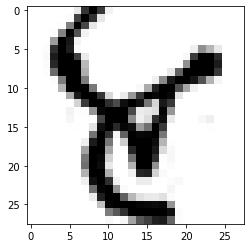

LABEL: 9


In [38]:
LR_prediction = reg.predict(X_test)

SVM_prediction = best_SVM.predict(X_test) 

lr_missed= np.where(LR_prediction != y_test)
svm_correct = np.where(SVM_prediction == y_test)
res_index = np.intersect1d(svm_correct,lr_missed)


# ADD CODE
plot_input(X_test,y_test,np.random.choice(res_index))


## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [58]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = sklearn.metrics.confusion_matrix(y_test,SVM_prediction,normalize=None)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = sklearn.metrics.confusion_matrix(y_test,LR_prediction,normalize=None)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5792 5835 5808 5788 5793 5779 5771 5792 5828 5814]

 Confusion matrix SVM  
 
 [[5372    4    9   46   70   61    4  127   63   36]
 [  48 4053  339   66  181   16  251    5  340  536]
 [   0  111 4027  291  102   10  681   20  329  237]
 [  15   76  146 4924  101  247   28   50  165   36]
 [ 291  118  193   58 4617   18  152   45  100  201]
 [ 122   39  547  263   62 4480   95   22  125   24]
 [  41  173  520  105  172   14 4609   59   40   38]
 [  85   24   81   30  298   41   98 4925   81  129]
 [ 100  170  250  145   12  147  285    4 4678   37]
 [  44  120  237   53  231    5   18   12  124 4970]]

 Confusion matrix SVM (normalized)   
 
 [[0.93 0.   0.   0.01 0.01 0.01 0.   0.02 0.01 0.01]
 [0.01 0.69 0.06 0.01 0.03 0.   0.04 0.   0.06 0.09]
 [0.   0.02 0.69 0.05 0.02 0.   0.12 0.   0.06 0.04]
 [0.   0.01 0.03 0.85 0.02 0.04 0.   0.01 0.03 0.01]
 [0.05 0.02 0.03 0.01 0.8  0.   0.03 0.01 0.02 0.03]
 [0.02 0.01 0.09 0.05 0.01 0.78 0.02 0.   0.0

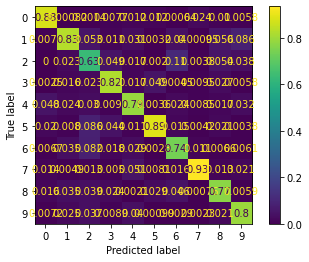

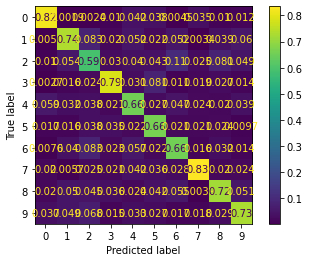

In [60]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

confusion_SVM = confusion_matrix(y_test,SVM_prediction,normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_SVM)

confusion_LR = confusion_matrix(y_test,LR_prediction,normalize='pred')
disp_2 = ConfusionMatrixDisplay(confusion_matrix=confusion_LR)

disp.plot()
disp_2.plot()
plt.show()

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


MY ANSWER:
    
it is obvious that some letters are more misclassifies (like label:2 ) whereas some letters acquires high accuracy (like label:0,7 ).
from my point of view the accuracy of input handwriting and images were lower and some labels were similar to eachother and results to misclassified.
as an example, label:2 has similarities to labels:6,8